# Ch4 - 5. groupby

groupby는 조건부 통계량을 계산하기 위한 방법으로 크게 **분할, 적용, 결합**의 세 단계로 구성된다.  
조건에 따른 분할이 일어나고, 원하는 집계 함수의 적용이 일어나고, 결과에서 결합으로 보여준다.  

```df.groupby(분할 기준 컬럼)[적용 기준 컬럼].집계함수```  
DataFrame을 분할 기준 컬럼을 기준으로 나누는 함수.  
주요 입력  
> by : 분할 기준 컬럼(목록)  
as_index : 분할 기준 컬럼들을 인덱스로 사용할 것인지 (default = True), 새로운 인덱스를 사용할 것인지. 그룹바이 자체만으로 집계하고 끝난다면 True, 새로운 데이터프레임으로 활용을 하려고 한다면 False를 사용하기도 한다.    

여러 개의 집계 함수나 사용자 정의 함수를 쓰고 싶다면 agg함수를 사용해야 한다.  

## pivot_table 과의 차이점

pivot_table과 groupby 모두 조건부 통계량을 기준으로 데이터를 집계한다는 점에서 완전히 동일하다. 하지만 출력물 구조의 차이가 있으므로 상황에 맞는 함수 선택이 필요하다.  
보통은 출력 결과 자체가 결과물인 경우, 시각화에 필요한 경우에는 pivot_table, 중간 산출물인 경우 다른 것과 붙이기 쉬운 구조이기 때문에 groupby를 활용한다.  
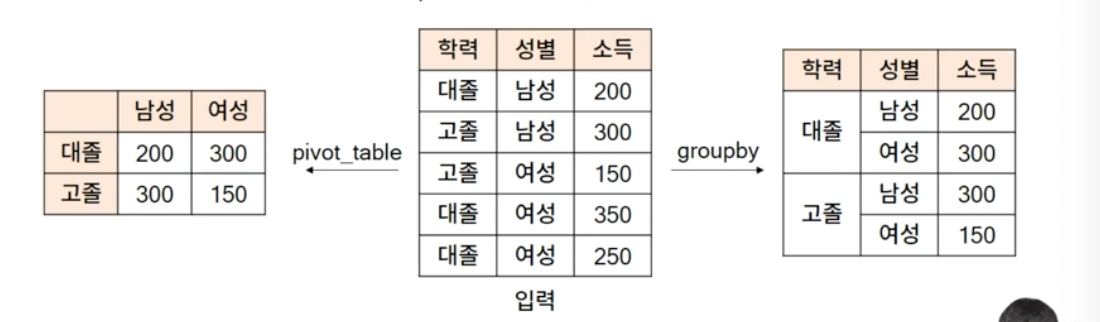




In [1]:
import os
import pandas as pd
os.chdir(r"/Users/Angela/Desktop/과속대학쿠쿠루/1. 데이터 핸들링/데이터")

In [2]:
df = pd.read_csv("온라인_판매기록.csv", encoding= "cp949")

In [3]:
df.head()

,쇼핑몰,제품,수량,판매금액,쇼핑몰 유형
0,쿠팡,제품_16,8,1134400,쿠팡
1,쿠팡,제품_57,8,439200,쿠팡
2,쿠팡,제품_25,4,495200,쿠팡
3,쿠팡,제품_18,4,578000,쿠팡
4,쿠팡,제품_90,2,75000,쿠팡


 ### 컬럼이 인덱스로 들어가고, 결과물이 시리즈로 나오는 경우
 
 시리즈의 이름 자체가 원하는 적용기준 컬럼 이름이 되었다.  
 Name을 바꾸어주어야하는 경우가 생긴다.  

In [4]:
df.groupby(['쇼핑몰 유형'])['수량'].mean()

쇼핑몰 유형
동물병원      5.512889
온라인II     5.807143
온라인사이트    5.477670
유통대리점     5.493333
전시회       5.556701
쿠팡        5.396389
할인점       5.288525
할인점II     5.469565
Name: 수량, dtype: float64

### as_index = False : 새 인덱스 부여

새로운 컬럼으로 정의되며, 데이터프레임으로 반환된다.  

In [5]:
df.groupby(['쇼핑몰 유형'], as_index = False)['수량'].mean()

,쇼핑몰 유형,수량
0,동물병원,5.512889
1,온라인II,5.807143
2,온라인사이트,5.477670
3,유통대리점,5.493333
4,전시회,5.556701
5,쿠팡,5.396389
6,할인점,5.288525
7,할인점II,5.469565


### 적용 컬럼이 둘 이상일 때

In [6]:
# 강의에서는 적용 컬럼 리스트를 묶지 않았다. 
df.groupby(['쇼핑몰 유형'])['수량', '판매금액'].mean()

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_50900/1956005387.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['쇼핑몰 유형'])['수량', '판매금액'].mean()


,수량,판매금액
쇼핑몰 유형,,
동물병원,5.512889,439390.844444
온라인II,5.807143,475726.428571
온라인사이트,5.477670,454746.019417
유통대리점,5.493333,462627.384615
전시회,5.556701,447135.051546
쿠팡,5.396389,433447.802198
할인점,5.288525,427162.295082
할인점II,5.469565,440754.782609


In [7]:
df.groupby(['쇼핑몰 유형'])['수량', '판매금액'].agg(['mean', 'max'])

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_50900/2668351748.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['쇼핑몰 유형'])['수량', '판매금액'].agg(['mean', 'max'])


수량               판매금액         
            mean max           mean      max
쇼핑몰 유형                                      
동물병원    5.512889  10  439390.844444  1515000
온라인II   5.807143  10  475726.428571  1530000
온라인사이트  5.477670  10  454746.019417  1533000
유통대리점   5.493333  10  462627.384615  1530000
전시회     5.556701  10  447135.051546  1486000
쿠팡      5.396389  10  433447.802198  1533000
할인점     5.288525  10  427162.295082  1533000
할인점II   5.469565  10  440754.782609  1515000

In [8]:
df.groupby(['쇼핑몰 유형'])[['수량', '판매금액']].agg(['mean', 'max'])

수량               판매금액         
            mean max           mean      max
쇼핑몰 유형                                      
동물병원    5.512889  10  439390.844444  1515000
온라인II   5.807143  10  475726.428571  1530000
온라인사이트  5.477670  10  454746.019417  1533000
유통대리점   5.493333  10  462627.384615  1530000
전시회     5.556701  10  447135.051546  1486000
쿠팡      5.396389  10  433447.802198  1533000
할인점     5.288525  10  427162.295082  1533000
할인점II   5.469565  10  440754.782609  1515000

### 멀티인덱스: 분할 기준 컬럼을 둘 이상으로 지정했을 때

직접 함수를 정의해서 aggation function으로 지정



In [9]:
# 최대값과 최소값의 차이를 구하는 함수
def my_func(value):
    return max(value) - min(value)

df.groupby(['쇼핑몰 유형', '제품'])[['수량', '판매금액']].agg(my_func)

수량    판매금액
쇼핑몰 유형 제품               
동물병원   제품_01   7  512400
       제품_02   8  129600
       제품_03   9  351900
       제품_04   8  341600
       제품_05   8  860800
...           ..     ...
할인점II  제품_93   0       0
       제품_95   2  194600
       제품_97   0       0
       제품_98   0       0
       제품_99   0       0

[762 rows x 2 columns]